In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif

In [2]:
# import dataset
data = pd.read_csv('dataset_v3.csv')
data.head() 

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
# memisahkan fitur dan label
X = data.drop('Result', axis=1)
y = data['Result']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
# remove constant, quasi constant
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [6]:
X_train_filter

array([[-1, -1,  1, ...,  1,  0,  1],
       [-1, -1,  1, ..., -1,  1,  1],
       [-1, -1,  1, ...,  1,  1,  1],
       ...,
       [-1,  1,  1, ..., -1,  1, -1],
       [-1, -1,  1, ...,  1,  1,  1],
       [-1, -1,  1, ...,  1,  1,  1]], dtype=int64)

In [7]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [8]:
X_train_T

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ...,  1, -1, -1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [ 1, -1,  1, ..., -1,  1,  1],
       [ 0,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ..., -1,  1,  1]], dtype=int64)

In [9]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [10]:
X_train_T

,0,1,2,3,4,5,6,7,8,9,...,8834,8835,8836,8837,8838,8839,8840,8841,8842,8843
0,-1,-1,-1,-1,-1,1,1,-1,-1,-1,...,1,1,1,1,-1,1,-1,-1,-1,-1
1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,1,-1,-1
2,1,1,1,1,1,1,1,1,1,-1,...,1,1,1,1,-1,-1,-1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,-1
4,1,1,1,1,1,1,1,1,1,-1,...,1,1,1,1,-1,-1,-1,1,1,1
5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,1
6,0,0,-1,0,1,0,0,-1,0,0,...,0,1,1,1,-1,-1,-1,-1,1,1
7,1,-1,1,1,1,0,1,1,-1,-1,...,1,-1,1,1,-1,1,-1,-1,1,1
8,1,-1,-1,1,-1,-1,1,-1,1,-1,...,-1,1,1,-1,1,1,-1,-1,1,-1
9,1,-1,1,1,1,1,1,1,1,1,...,1,-1,1,1,-1,1,-1,1,-1,-1


In [11]:
#Remove duplicate features
X_train_T.duplicated().sum()


0

In [12]:
duplicated_features = X_train_T.duplicated()
features_to_keep = [not index for index in duplicated_features]

In [13]:
print(duplicated_features)
print(features_to_keep)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [14]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [15]:
print(X_train_unique)

      0   1   2   3   4   5   6   7   8   9   ...  20  21  22  23  24  25  26  \
0     -1  -1   1   1   1  -1   0   1   1   1  ...   1   1   1   1   1   1  -1   
1     -1  -1   1   1   1  -1   0  -1  -1  -1  ...   1  -1   1   1   1   1  -1   
2     -1  -1   1   1   1  -1  -1   1  -1   1  ...   1   1   1  -1   1   0  -1   
3     -1   1   1   1   1  -1   0   1   1   1  ...   1   1   1   1   1  -1   1   
4     -1  -1   1   1   1  -1   1   1  -1   1  ...   1   1   1  -1   1   1  -1   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
8839   1  -1  -1   1  -1  -1  -1   1   1   1  ...  -1   1   1   1   1  -1  -1   
8840  -1  -1  -1   1  -1  -1  -1  -1  -1  -1  ...  -1  -1  -1  -1  -1   1  -1   
8841  -1   1   1   1   1  -1  -1  -1  -1   1  ...   1   1   1  -1   1   0   1   
8842  -1  -1   1   1   1   1   1   1   1  -1  ...   1  -1   1  -1   1   1  -1   
8843  -1  -1   1  -1   1   1   1   1  -1  -1  ...  -1  -1  -1  -1   1   1  -1   

      27  28  29  
0      1

In [16]:
X_train_unique.shape, X_test_unique.shape

((8844, 30), (2211, 30))

In [17]:
mi = mutual_info_classif(X_train_unique, y_train)

In [18]:
mi = pd.Series(mi)
mi.index = X_train.columns

In [19]:
mi.index = X_train_unique.columns

In [20]:
mi

0     0.004444
1     0.006364
2     0.000000
3     0.005694
4     0.000000
5     0.092939
6     0.070150
7     0.343470
8     0.025624
9     0.000000
10    0.007141
11    0.008298
12    0.025508
13    0.336982
14    0.036205
15    0.021532
16    0.000000
17    0.011925
18    0.004210
19    0.000000
20    0.010980
21    0.006672
22    0.006307
23    0.009296
24    0.000000
25    0.073231
26    0.009184
27    0.009938
28    0.007797
29    0.006252
dtype: float64

In [21]:
mi.sort_values(ascending=False)

7     0.343470
13    0.336982
5     0.092939
25    0.073231
6     0.070150
14    0.036205
8     0.025624
12    0.025508
15    0.021532
17    0.011925
20    0.010980
27    0.009938
23    0.009296
26    0.009184
11    0.008298
28    0.007797
10    0.007141
21    0.006672
1     0.006364
22    0.006307
29    0.006252
3     0.005694
0     0.004444
18    0.004210
9     0.000000
16    0.000000
19    0.000000
4     0.000000
2     0.000000
24    0.000000
dtype: float64

In [22]:
mi.sort_values(ascending=False, inplace = True)

<AxesSubplot:>

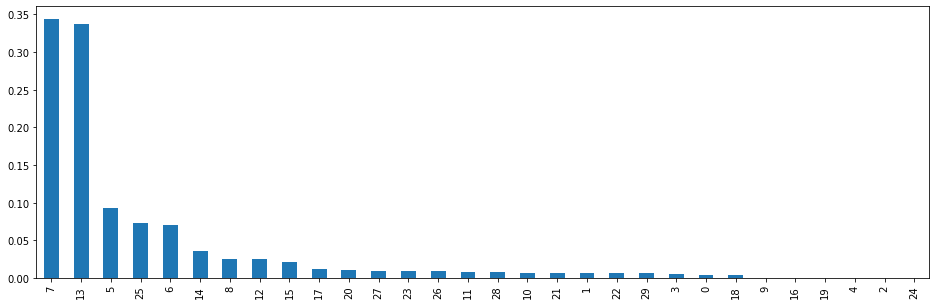

In [23]:
mi.plot.bar(figsize = (16, 5))

In [38]:
# Memilih fitur berdasarkan nilai tertinggi
sel = SelectPercentile(mutual_info_classif, percentile=80).fit(X_train_unique, y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 17, 18, 19,
            20, 21, 22, 23, 25, 26, 27],
           dtype='int64')

In [39]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)

In [40]:
# Classifier DecisionTree
def run_dt(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier(
        criterion='gini',
        splitter='best',
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features=None,
        random_state=None,
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        min_impurity_split=0,
        class_weight=None,
        presort='deprecated',
        ccp_alpha=0.0
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Jumlah data: ', len(X))
    print('Jumlah data training: ', len(X_train))
    print('Jumlah data testing: ', len(X_test))
    print('Accuracy on test set: ', "{:.3f}".format(accuracy_score(y_test, y_pred)*100),"%")
    print('Confusion Matrix:')
    test_conf = confusion_matrix(y_test, y_pred)
    print(test_conf)
    print('Classification Report:')
    print(classification_report(y_test, y_pred, digits=5))

In [41]:
# DecisionTree 
print(' ------- Tanpa seleksi fitur -------')
run_dt(X_train, X_test, y_train, y_test)
print(' ')
print(' ------- Dengan seleksi fitur ------- ')
run_dt(X_train_mi, X_test_mi, y_train, y_test)

 ------- Tanpa seleksi fitur -------
Jumlah data:  11055
Jumlah data training:  8844
Jumlah data testing:  2211
Accuracy on test set:  96.246 %
Confusion Matrix:
[[ 937   40]
 [  43 1191]]
Classification Report:
              precision    recall  f1-score   support

          -1    0.95612   0.95906   0.95759       977
           1    0.96751   0.96515   0.96633      1234

    accuracy                        0.96246      2211
   macro avg    0.96181   0.96211   0.96196      2211
weighted avg    0.96248   0.96246   0.96247      2211

 
 ------- Dengan seleksi fitur ------- 
Jumlah data:  11055
Jumlah data training:  8844
Jumlah data testing:  2211
Accuracy on test set:  96.020 %
Confusion Matrix:
[[ 935   42]
 [  46 1188]]
Classification Report:
              precision    recall  f1-score   support

          -1    0.95311   0.95701   0.95506       977
           1    0.96585   0.96272   0.96429      1234

    accuracy                        0.96020      2211
   macro avg    0.95948   0

In [42]:
indices = X_train_unique.columns[sel.get_support()]
indices
# X_new_fill = [i for j, i in enumerate(X_new) if j in indices]

Int64Index([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 17, 18, 19,
            20, 21, 22, 23, 25, 26, 27],
           dtype='int64')

In [43]:
X_new = [1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 0, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 
1, 1, 1]

In [44]:
X_new_fill = [i for j, i in enumerate(X_new) if j in indices]
X_new_fill

[1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 0, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1]

In [37]:
X_new_fill = np.array(X_new_fill).reshape(-1, 1)
X_new_fill

array([-1])